# Golden Square Fractal

The code below draws a fractal shape with the color scheme carefully manipulated to make it pretty. See the resulting shape below the code.

For now I'll leave it to you the reader to wrap (or warp) you mind around this.

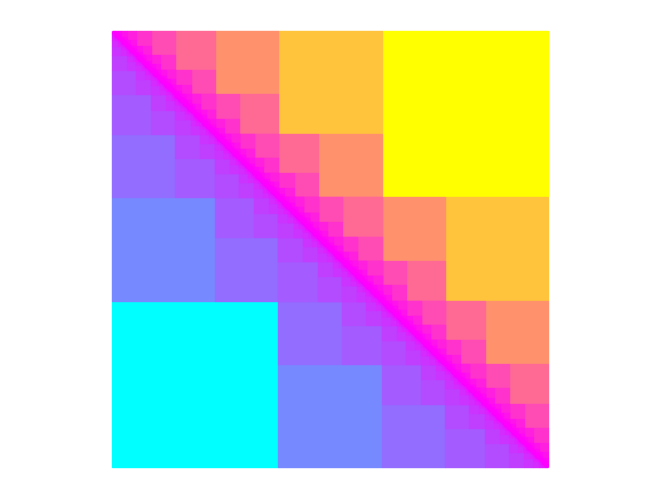

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from itertools import chain, combinations

SAVE = False
SECOND_HALF = True

def powerset(s):
# Returns the powerset of s. s doesn't need to be a set. I cheated a little; The output is a list, not a set, and
# The elements of the output set are tuples rather than sets.
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

depth = 14
phi = (5**.5 + 1)/2 # Golden ratio
psi = 1/phi
sideLength = 1



# start building the plot 
fig = plt.figure()
ax = plt.axes([0,0,1,1])
colors = plt.get_cmap("cool")
colors2 = plt.get_cmap("spring")

for i in range(0, depth): # for iteration i
    sideLength *= psi
    powers = range(1, i + 1) # powers of psi
    psiPowers = set([psi ** p for p in powers])
    coords = set() # lower-left coordinate of squares for this iteration
    for tupl in powerset(psiPowers): # fill the coords set
        x = sum(tupl)
        y = sum(psiPowers - set(tupl))
        coords.add((x, y))
    for coord in coords:
        square = mpatches.Rectangle(coord, sideLength, sideLength, color = colors((i/(depth-1))**(.3)))
        ax.add_patch(square)
        if SECOND_HALF:
            # Subtraction of tuples
            # using map() + lambda
            coord2 = tuple(map(lambda i, j: i - j, (phi, phi), coord))
            square = mpatches.Rectangle(coord2, -sideLength, -sideLength, color = colors2((1-i/(depth-1))**(10/3)))
            ax.add_patch(square)
    
ax.set_xticks([]); ax.set_yticks([]) # suppress display of axes
plt.axis('equal')
plt.axis('off')

if SAVE:
    plt.savefig('square.png', bbox_inches='tight', transparent=True, pad_inches=0)
plt.show()